# Madrid Air Quality

Die folgenden Daten müssen von kaggle.com kopiert, entpackt und dann in Databricks geladen werden:
- air-quality-madrid.zip                   151 MB
- weather_madrid_LEMD_1997_2015.csv.zip    148 KB

## Analysieren der Wetter Daten von Madrid der Jahre 1997 - 2015

In [4]:
weather = sqlContext.read.format("com.databricks.spark.csv")\
.option("header","true")\
.option("inferSchema","true")\
.load("/FileStore/tables/Madrid/weather_madrid_LEMD_1997_2015.csv")

In [5]:
weather.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [6]:
weather.show()

+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
 CET|Max TemperatureC|Mean TemperatureC|Min TemperatureC|Dew PointC|MeanDew PointC|Min DewpointC|Max Humidity| Mean Humidity| Min Humidity| Max Sea Level PressurehPa| Mean Sea Level PressurehPa| Min Sea Level PressurehPa| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM| Max Wind SpeedKm/h| Mean Wind SpeedKm/h| Max Gust SpeedKm/h|Precipitationmm| CloudCover| Events|WindDirDegrees|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
1997-01-01 00:00:00| 7| 4| 2| 5| 3| 2| 100| 95| 76| 1010| 1008| 1004| 10| 9| 4| 13| 6| null| 0.0| 6| null| 229|
1997-01-02 00:00:00| 7| 3| 0| 6| 3| 0| 100| 92| 71| 1007| 1003| 997| 10| 9| 4| 26| 8| 47| 0.0| 5| Rain| 143|
1997-01-03 00:00:00| 5| 3| 2| 5| 1| -1| 100| 85| 70| 1005| 999| 996| 10| 10| 7| 27| 19| null| 0.0| 6|Rain-Snow| 256|
1997-01-04 00:00:00| 7| 3| -1| -2| -3| -4| 86| 63| 49| 1012| 1010| 1005| 10| 10| 10| 27| 19| 40| 0.0| 2| null| 284|
1997-01-05 00:00:00| 2| 0| -1| 2| 0| -3| 100| 95| 86| 1012| 1008| 1005| 10| 5| 1| 14| 6| null| 0.0| 7| Snow| 2|
1997-01-06 00:00:00| 7| 3| 1| 2| -1| -3| 100| 82| 57| 1014| 1010| 1008| 10| 10| 10| 11| 5| null| 0.0| 4| null| 64|
1997-01-07 00:00:00| 2| 0| -2| 1| -1| -3| 100| 93| 75| 1016| 1014| 1009| 10| 7| 0| 6| 2| null| 0.0| 7| Snow| 43|
1997-01-08 00:00:00| 8| 4| 1| 7| 4| 1| 100| 96| 87| 1015| 1005| 1003| 10| 8| 4| 26| 8| null| 0.0| 7| Rain| 273|
1997-01-09 00:00:00| 12| 10| 8| 8| 3| 0| 100| 65| 44| 1015| 1008| 1003| 10| 10| 10| 48| 23| 48| 0.0| 4| Rain| 274|
1997-01-10 00:00:00| 13| 8| 3| 8| 5| 1| 93| 83| 63| 1021| 1018| 1016| 10| 10| 10| 13| 5| null| 0.0| 5| null| 100|
1997-01-11 00:00:00| 16| 10| 5| 10| 7| 5| 100| 90| 67| 1024| 1022| 1021| 10| 6| 0| 11| 2| null| 0.0| 3| Fog| 344|
1997-01-12 00:00:00| 17| 10| 3| 8| 6| 3| 100| 84| 55| 1024| 1022| 1020| 10| 10| 10| 14| 8| null| 0.0| 1| null| 345|
1997-01-13 00:00:00| 15| 9| 4| 9| 4| -1| 100| 75| 38| 1022| 1021| 1019| 10| 9| 3| 11| 2| null| 0.0| 4| Fog| 128|
1997-01-14 00:00:00| 11| 6| 0| 4| 2| 0| 100| 81| 50| 1022| 1020| 1019| 10| 9| 1| 14| 2| null| 0.0| 4| null| 35|
1997-01-15 00:00:00| 11| 8| 5| 7| 5| 4| 100| 83| 62| 1021| 1019| 1018| 10| 10| 8| 10| 3| null| 0.0| 6| Rain| 16|
1997-01-16 00:00:00| 12| 9| 6| 8| 7| 6| 100| 89| 72| 1019| 1017| 1015| 10| 10| 10| 24| 5| null| 0.0| 6| null| 63|
1997-01-17 00:00:00| 13| 9| 5| 9| 5| 1| 100| 78| 47| 1022| 1018| 1015| 10| 10| 7| 27| 13| null| 0.0| 4| Rain| 267|
1997-01-18 00:00:00| 6| 3| 2| 6| 4| 2| 100| 98| 93| 1022| 1019| 1015| 10| 7| 3| 8| 2| null| 0.0| 6| Rain| 357|
1997-01-19 00:00:00| 9| 7| 6| 7| 6| 5| 100| 97| 87| 1015| 1011| 1004| 10| 6| 2| 14| 8| null| 0.0| 4| Rain| 99|
1997-01-20 00:00:00| 9| 7| 5| 9| 7| 5| 100| 100| 100| 1008| 1005| 1003| 10| 8| 3| 13| 5| null| 0.0| 5| Rain| 320|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
only showing top 20 rows

In [7]:
weather.registerTempTable("weatherT")

In [8]:
res1 = sqlContext.sql("SELECT CET, `Max TemperatureC`, `Min TemperatureC`, `Mean TemperatureC` FROM weatherT")

In [9]:
res1.show()

+-------------------+----------------+----------------+-----------------+
 CET|Max TemperatureC|Min TemperatureC|Mean TemperatureC|
+-------------------+----------------+----------------+-----------------+
1997-01-01 00:00:00| 7| 2| 4|
1997-01-02 00:00:00| 7| 0| 3|
1997-01-03 00:00:00| 5| 2| 3|
1997-01-04 00:00:00| 7| -1| 3|
1997-01-05 00:00:00| 2| -1| 0|
1997-01-06 00:00:00| 7| 1| 3|
1997-01-07 00:00:00| 2| -2| 0|
1997-01-08 00:00:00| 8| 1| 4|
1997-01-09 00:00:00| 12| 8| 10|
1997-01-10 00:00:00| 13| 3| 8|
1997-01-11 00:00:00| 16| 5| 10|
1997-01-12 00:00:00| 17| 3| 10|
1997-01-13 00:00:00| 15| 4| 9|
1997-01-14 00:00:00| 11| 0| 6|
1997-01-15 00:00:00| 11| 5| 8|
1997-01-16 00:00:00| 12| 6| 9|
1997-01-17 00:00:00| 13| 5| 9|
1997-01-18 00:00:00| 6| 2| 3|
1997-01-19 00:00:00| 9| 6| 7|
1997-01-20 00:00:00| 9| 5| 7|
+-------------------+----------------+----------------+-----------------+
only showing top 20 rows

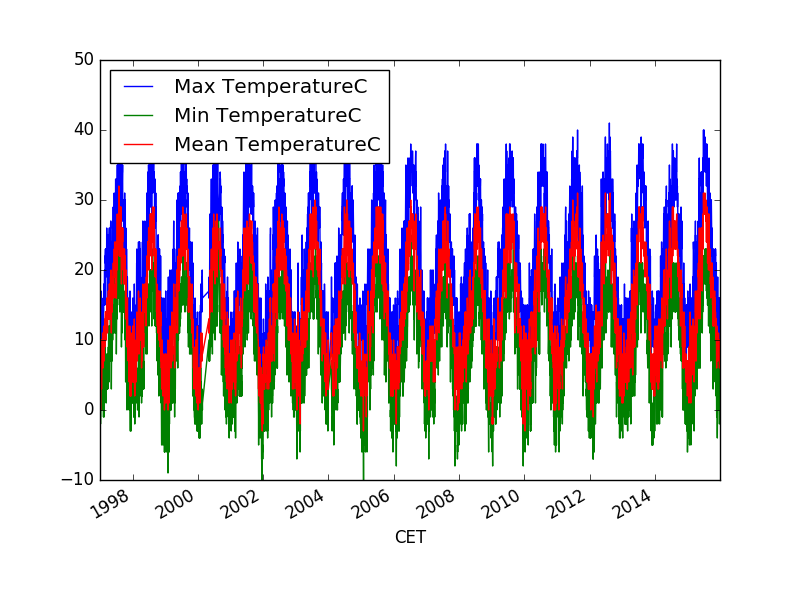

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res1.toPandas()
pdDF.plot(x='CET', y='Max TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Min TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Mean TemperatureC', ax=ax)
display()

In [11]:
res2 = sqlContext.sql("SELECT CET, ` Max VisibilityKm`, ` Mean VisibilityKm`, ` Min VisibilitykM` FROM weatherT")

In [12]:
res2.show()

+-------------------+-----------------+------------------+-----------------+
 CET| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM|
+-------------------+-----------------+------------------+-----------------+
1997-01-01 00:00:00| 10| 9| 4|
1997-01-02 00:00:00| 10| 9| 4|
1997-01-03 00:00:00| 10| 10| 7|
1997-01-04 00:00:00| 10| 10| 10|
1997-01-05 00:00:00| 10| 5| 1|
1997-01-06 00:00:00| 10| 10| 10|
1997-01-07 00:00:00| 10| 7| 0|
1997-01-08 00:00:00| 10| 8| 4|
1997-01-09 00:00:00| 10| 10| 10|
1997-01-10 00:00:00| 10| 10| 10|
1997-01-11 00:00:00| 10| 6| 0|
1997-01-12 00:00:00| 10| 10| 10|
1997-01-13 00:00:00| 10| 9| 3|
1997-01-14 00:00:00| 10| 9| 1|
1997-01-15 00:00:00| 10| 10| 8|
1997-01-16 00:00:00| 10| 10| 10|
1997-01-17 00:00:00| 10| 10| 7|
1997-01-18 00:00:00| 10| 7| 3|
1997-01-19 00:00:00| 10| 6| 2|
1997-01-20 00:00:00| 10| 8| 3|
+-------------------+-----------------+------------------+-----------------+
only showing top 20 rows

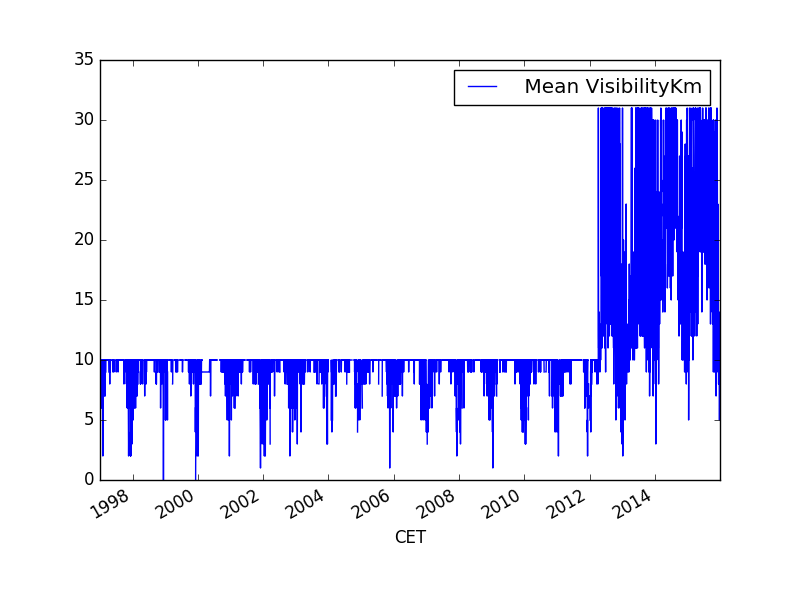

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res2.toPandas()
#pdDF.plot(x='CET', y=' Max VisibilityKm', ax=ax)
#pdDF.plot(x='CET', y=' Min VisibilitykM', ax=ax)
pdDF.plot(x='CET', y=' Mean VisibilityKm', ax=ax)
display()

## Analysieren der Daten der Luftqualität von Madrid

## Messstationen

Einlesen der Daten der Messstationen aus CSV-File:

In [17]:
stations = sqlContext.read.format("com.databricks.spark.csv")\
.option("header","true")\
.option("inferSchema","true")\
.load("/FileStore/tables/Madrid/stations.csv")
stations.registerTempTable("stationsT")

In [18]:
stationsRes = sqlContext.sql("SELECT * FROM stationsT")
stationsRes.show()

+--------+--------------------+--------------------+-------------------+------------------+---------+
 id| name| address| lon| lat|elevation|
+--------+--------------------+--------------------+-------------------+------------------+---------+
28079004| Pza. de España| Plaza de España| -3.712247222222224|40.423852777777775| 635|
28079008| Escuelas Aguirre|Entre C/ Alcalá y...| -3.682319444444445| 40.42156388888888| 670|
28079011| Avda. Ramón y Cajal|Avda. Ramón y Caj...|-3.6773555555555553| 40.451475| 708|
28079016| Arturo Soria|C/ Arturo Soria ...|-3.6392333333333333| 40.44004722222222| 693|
28079017| Villaverde| C/. Juan Peñalver| -3.713322222222221|40.347138888888885| 604|
28079018| Farolillo|Calle Farolillo -...|-3.7318527777777777| 40.39478055555556| 630|
28079024| Casa de Campo|Casa de Campo (T...|-3.7473472222222224| 40.41935555555556| 642|
28079027| Barajas Pueblo|C/. Júpiter, 21 (...| -3.580030555555555| 40.47692777777778| 621|
28079035| Pza. del Carmen|Plaza del Carmen ...|-3.7031722222222223| 40.41920833333333| 659|
28079036| Moratalaz|Avd. Moratalaz e...|-3.6453055555555554| 40.40794722222222| 685|
28079038| Cuatro Caminos|Avda. Pablo Igles...|-3.7071277777777785| 40.44554444444445| 698|
28079039| Barrio del Pilar|Avd. Betanzos esq...|-3.7115416666666654| 40.47822777777778| 674|
28079040| Vallecas|C/ Arroyo del Oli...|-3.6515222222222223| 40.38815277777777| 677|
28079047| Mendez Alvaro|C/ Juan de Marian...| -3.686825|40.398113888888886| 599|
28079048| Castellana|C/ Jose Gutierrez...| -3.690366666666667| 40.43989722222222| 676|
28079049| Parque del Retiro|Paseo Venezuela- ...| -3.682583333333333|40.414444444444435| 662|
28079050| Plaza Castilla|Plaza Castilla (C...| -3.688769444444445| 40.46557222222223| 728|
28079054|Ensanche de Vallecas|Avda La Gavia / A...| -3.612116666666666|40.372933333333336| 627|
28079055| Urb. Embajada| C/ Riaño (Barajas) |-3.5807472222222216| 40.46253055555556| 618|
28079056|Pza. Fernández La...| Pza. Fernández L...|-3.7187277777777785| 40.38496388888889| 604|
+--------+--------------------+--------------------+-------------------+------------------+---------+
only showing top 20 rows

In [19]:
stationsRes.count()

Out[ 10 ]: 24

## Luftqualitäten pro Jahr

Einlesen der Daten der Luftqualitäten pro Jahr aus CSV-File:

In [22]:
air_2001 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2001.csv")
air_2002 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2002.csv")
air_2003 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2003.csv")
air_2004 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2004.csv")
air_2005 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2005.csv")
air_2006 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2006.csv")
air_2007 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2007.csv")
air_2008 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2008.csv")
air_2009 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2009.csv")
air_2010 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2010.csv")
air_2011 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2011.csv")
air_2012 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2012.csv")
air_2013 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2013.csv")
air_2014 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2014.csv")
air_2015 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2015.csv")
air_2016 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2016.csv")
air_2017 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2017.csv")
air_2018 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2018.csv")


Daten von 2001 ansehen:

In [24]:
air_2001.registerTempTable("air_2001T")

In [25]:
res2001 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T")
res2001.show()

+-------------------+-------------------+------------------+--------+
 date| CO| NO_2| station|
+-------------------+-------------------+------------------+--------+
2001-08-01 01:00:00| 0.3700000047683716|58.400001525878906|28079001|
2001-08-01 01:00:00| 0.3400000035762787| 56.25|28079035|
2001-08-01 01:00:00| 0.2800000011920929| 50.65999984741211|28079003|
2001-08-01 01:00:00| 0.4699999988079071| 69.79000091552734|28079004|
2001-08-01 01:00:00|0.38999998569488525|22.829999923706055|28079039|
2001-08-01 01:00:00| 0.6299999952316284| 66.26000213623047|28079006|
2001-08-01 01:00:00| 0.2800000011920929| 35.79999923706055|28079007|
2001-08-01 01:00:00| 0.6700000166893005| 74.83000183105469|28079009|
2001-08-01 01:00:00| 0.4099999964237213|33.209999084472656|28079038|
2001-08-01 01:00:00|0.17000000178813934| 24.1299991607666|28079011|
2001-08-01 01:00:00| 0.3799999952316284|40.900001525878906|28079012|
2001-08-01 01:00:00|0.17000000178813934| 30.6299991607666|28079040|
2001-08-01 01:00:00|0.18000000715255737|30.920000076293945|28079014|
2001-08-01 01:00:00|0.23999999463558197|33.869998931884766|28079015|
2001-08-01 01:00:00| 0.25|13.970000267028809|28079016|
2001-08-01 01:00:00|0.17000000178813934|28.979999542236328|28079018|
2001-08-01 01:00:00|0.25999999046325684| 44.77000045776367|28079019|
2001-08-01 01:00:00|0.28999999165534973| 34.06999969482422|28079036|
2001-08-01 01:00:00|0.33000001311302185|43.209999084472656|28079021|
2001-08-01 01:00:00| 0.8100000023841858| 53.47999954223633|28079022|
+-------------------+-------------------+------------------+--------+
only showing top 20 rows

Daten von 2001 der Station 28079007 darstellen:

In [27]:
res2001S007 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T WHERE station=28079007")
pdDF = res2001S007.toPandas()

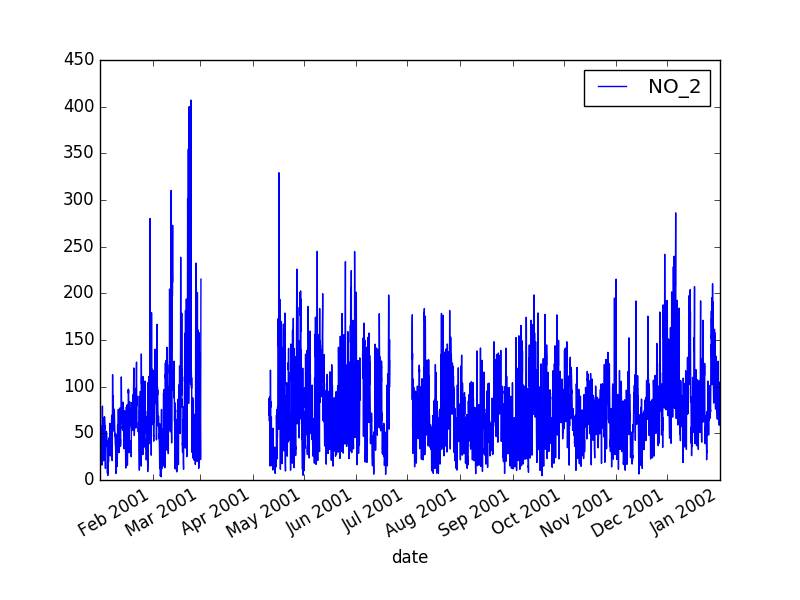

In [28]:
plt.clf()
ax = plt.gca()
#pdDF.plot(x='date', y='CO', ax=ax)
pdDF.plot(x='date', y='NO_2', ax=ax)
display()

Vereinigung der Jahres-Datentabellen zu einem File.
Dabei werden/müssen einzelne Kolonnen angepasst bzw. entfernt werden.

In [30]:
air_df1 = air_2001.unionByName(air_2002).unionAll(air_2003)
air_df2 = air_2004.unionByName(air_2005).unionAll(air_2006).unionAll(air_2007).unionAll(air_2008).unionAll(air_2009).unionAll(air_2010)
air_df3 = air_2011.unionByName(air_2012).unionAll(air_2013).unionAll(air_2014).unionAll(air_2015).unionAll(air_2016)
air_df4 = air_2017.unionByName(air_2018)
air_df1.printSchema()
air_df2.printSchema()
air_df3.printSchema()
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CH4: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [31]:
common_columns = list(set(air_df1.columns).intersection(air_df2.columns).intersection(air_df3.columns).intersection(air_df4.columns))
print(common_columns)

['CO', 'O_3', 'TOL', 'station', 'EBE', 'NMHC', 'SO_2', 'TCH', 'PM10', 'NO_2', 'date', 'BEN']

In [32]:
for column in list(set(air_df1.columns) - set(common_columns)):
  air_df1 = air_df1.drop(column)
air_df1.printSchema()
for column in list(set(air_df2.columns) - set(common_columns)):
  air_df2 = air_df2.drop(column)
air_df2.printSchema()
for column in list(set(air_df3.columns) - set(common_columns)):
  air_df3 = air_df3.drop(column)
air_df3.printSchema()
for column in list(set(air_df4.columns) - set(common_columns)):
  air_df4 = air_df4.drop(column)
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [33]:
air_df = air_df1.unionByName(air_df2).unionByName(air_df3).unionByName(air_df4)
air_df.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

Anzahl der Messreihen ausgeben:

In [35]:
#air_df = air_df.dropDuplicates()
air_df.registerTempTable("airT")
res1 = sqlContext.sql("SELECT count(*) FROM airT")
res1.show()

+--------+
count(1)|
+--------+
 3808224|
+--------+

CSV-File schreiben mit allen Messreihen:

In [37]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018", True)
air_df.repartition(1).write.csv("/FileStore/tables/Madrid/madrid_2001-2018", sep=",",header = 'true')

Parquet-File mit allen Messreihen schreiben:

In [39]:
air_df.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [40]:
Plots über die ganze Zeit:

In [41]:
air_df2 = spark.read.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [42]:
air_df2.registerTempTable("airT")
fullData = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL FROM airT WHERE station=28079036")
fullData.show()

+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
 date| BEN| CO| EBE|NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
2004-09-27 23:00:00|null| 2.140000104904175|null|null| 93.61000061035156| 4.840000152587891| 85.31999969482422|15.859999656677246|null|null|
2004-09-28 00:00:00|null| 1.7999999523162842|null|null| 93.75| 4.159999847412109| 75.73999786376953|15.210000038146973|null|null|
2004-09-28 01:00:00|null| 1.1399999856948853|null|null| 94.73999786376953| 3.990000009536743|46.869998931884766|11.260000228881836|null|null|
2004-09-28 02:00:00|null| 0.7900000214576721|null|null| 93.79000091552734| 4.059999942779541|47.630001068115234| 10.6899995803833|null|null|
2004-09-28 03:00:00|null| 0.6000000238418579|null|null| 86.44999694824219| 4.78000020980835| 49.08000183105469| 9.359999656677246|null|null|
2004-09-28 04:00:00|null|0.47999998927116394|null|null| 77.87000274658203| 5.380000114440918| 37.75| 9.069999694824219|null|null|
2004-09-28 05:00:00|null|0.46000000834465027|null|null| 69.9800033569336| 4.920000076293945| 27.90999984741211| 8.6899995803833|null|null|
2004-09-28 06:00:00|null| 0.3400000035762787|null|null| 59.61000061035156| 6.230000019073486|22.530000686645508| 7.340000152587891|null|null|
2004-09-28 07:00:00|null| 0.3400000035762787|null|null| 52.45000076293945| 9.949999809265137| 18.6299991607666| 7.039999961853027|null|null|
2004-09-28 08:00:00|null| 0.800000011920929|null|null|59.150001525878906| 4.699999809265137|27.290000915527344| 9.6899995803833|null|null|
2004-09-28 09:00:00|null| 0.7599999904632568|null|null|61.599998474121094|3.9700000286102295| 40.4900016784668| 9.800000190734863|null|null|
2004-09-28 10:00:00|null| 0.8399999737739563|null|null| 58.20000076293945| 5.460000038146973| 61.20000076293945|10.859999656677246|null|null|
2004-09-28 11:00:00|null| 0.4300000071525574|null|null|63.849998474121094|11.609999656677246| 82.83000183105469| 9.029999732971191|null|null|
2004-09-28 12:00:00|null| 0.4399999976158142|null|null| 64.54000091552734|27.399999618530273| 102.0999984741211| 7.710000038146973|null|null|
2004-09-28 13:00:00|null| 0.5099999904632568|null|null| 73.3499984741211|26.049999237060547| 70.51000213623047| 7.559999942779541|null|null|
2004-09-28 14:00:00|null| 0.6700000166893005|null|null| 78.05000305175781|24.290000915527344| 72.2699966430664| 8.140000343322754|null|null|
2004-09-28 15:00:00|null| 0.5299999713897705|null|null|63.849998474121094|38.349998474121094| 46.22999954223633| 8.319999694824219|null|null|
2004-09-28 16:00:00|null| 0.3700000047683716|null|null| 42.52000045776367|61.400001525878906|28.100000381469727| 7.840000152587891|null|null|
2004-09-28 17:00:00|null| 0.3700000047683716|null|null|48.970001220703125| 66.87000274658203|29.309999465942383| 7.309999942779541|null|null|
2004-09-28 18:00:00|null| 0.4300000071525574|null|null| 61.56999969482422| 75.77999877929688| 33.84000015258789| 6.96999979019165|null|null|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
only showing top 20 rows

In [43]:
fullDF = fullData.toPandas()

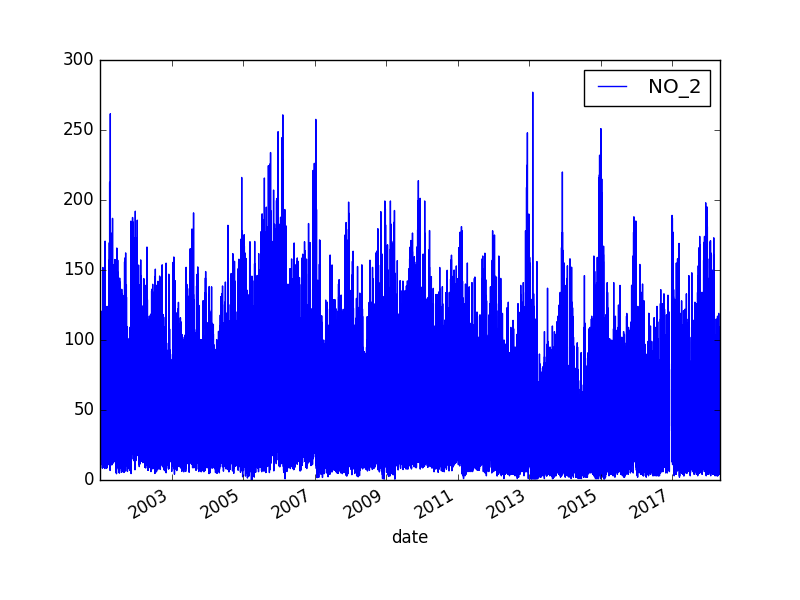

In [44]:
plt.clf()
ax = plt.gca()
fullDF.plot(x='date', y='NO_2', ax=ax)
display()

In [45]:
fullData2 = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL, station FROM airT")
fullData2.show()

+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
 date| BEN| CO| EBE| NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL| station|
+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
2004-09-27 23:00:00| null| 1.309999942779541| null| null|115.69999694824219| 4.170000076293945| 67.26000213623047|17.270000457763672| null| null|28079012|
2004-09-27 23:00:00| null|1.8799999952316284| null| null| 118.5999984741211| 6.570000171661377| 81.44000244140625| 18.09000015258789| null| null|28079040|
2004-09-27 23:00:00| null| 2.359999895095825| null| null| 109.0999984741211| 1.25| 128.8000030517578|23.200000762939453| null| null|28079014|
2004-09-27 23:00:00| null|1.4500000476837158| null|0.44999998807907104| 132.5| 2.930000066757202| 63.43000030517578|18.110000610351562| 1.809999942779541| null|28079015|
2004-09-27 23:00:00| null| 2.690000057220459| null| null| 127.5|11.489999771118164| 90.72000122070312|22.200000762939453| null| null|28079016|
2004-09-27 23:00:00| null| 2.109999895095825| null| null| 133.0| 7.010000228881836| 138.0|15.109999656677246| null| null|28079017|
2004-09-27 23:00:00| null| 2.25| null| 0.949999988079071| 96.08000183105469|2.4000000953674316| null|11.720000267028809| 2.25| null|28079018|
2004-09-27 23:00:00| null|1.2000000476837158| null| null|133.60000610351562| 5.28000020980835| 67.62999725341797|18.940000534057617| null| null|28079019|
2004-09-27 23:00:00| null| 2.140000104904175| null| null| 93.61000061035156| 4.840000152587891| 85.31999969482422|15.859999656677246| null| null|28079036|
2004-09-27 23:00:00| null|0.7300000190734863| null| null| 95.29000091552734| 4.570000171661377| 38.04999923706055|12.960000038146973| null| null|28079021|
2004-09-27 23:00:00| 8.210000038146973|1.2300000190734863| null| null| 102.9000015258789| 2.880000114440918| 93.8499984741211|18.649999618530273| null|32.310001373291016|28079022|
2004-09-27 23:00:00| 24.0|2.5199999809265137|45.939998626708984| 0.8700000047683716| 132.1999969482422|3.3299999237060547| 80.91000366210938| 16.90999984741211| 2.259999990463257| 62.34000015258789|28079023|
2004-09-27 23:00:00| null|0.6600000262260437| null|0.18000000715255737| 111.0| 4.670000076293945| 65.2699966430664| 9.5600004196167|1.4500000476837158| null|28079024|
2004-09-27 23:00:00| 5.889999866485596| 1.590000033378601| 6.559999942779541| null|129.60000610351562| 7.25|50.630001068115234|17.510000228881836| null|27.440000534057617|28079025|
2004-09-27 23:00:00| null| null| null| 0.6700000166893005| 145.5| 8.25| 60.7599983215332|14.619999885559082|1.9600000381469727| null|28079026|
2004-09-27 23:00:00| null| null| null| 0.3700000047683716| 139.6999969482422| null| 152.0| 8.239999771118164|1.5700000524520874| null|28079027|
2004-09-27 23:00:00| 9.289999961853027| 1.75|14.260000228881836| 0.5799999833106995| 118.5| 5.599999904632568| 82.08999633789062|17.479999542236328|1.8799999952316284|31.829999923706055|28079099|
2004-09-28 00:00:00| null|1.4500000476837158| null| null| 96.58000183105469| 6.480000019073486|52.380001068115234| 17.56999969482422| null| null|28079001|
2004-09-28 00:00:00|3.5399999618530273| 1.100000023841858| 5.519999980926514| 0.4300000071525574| 89.38999938964844|3.1500000953674316| 44.16999816894531| 8.09000015258789| 1.590000033378601|22.139999389648438|28079035|
2004-09-28 00:00:00| null| null| null| null| null| null| null| null| null| null|28079003|
+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
only showing top 20 rows

In [46]:
plt.clf()
ax = plt.gca()
fullDF2 = fullData2.toPandas()

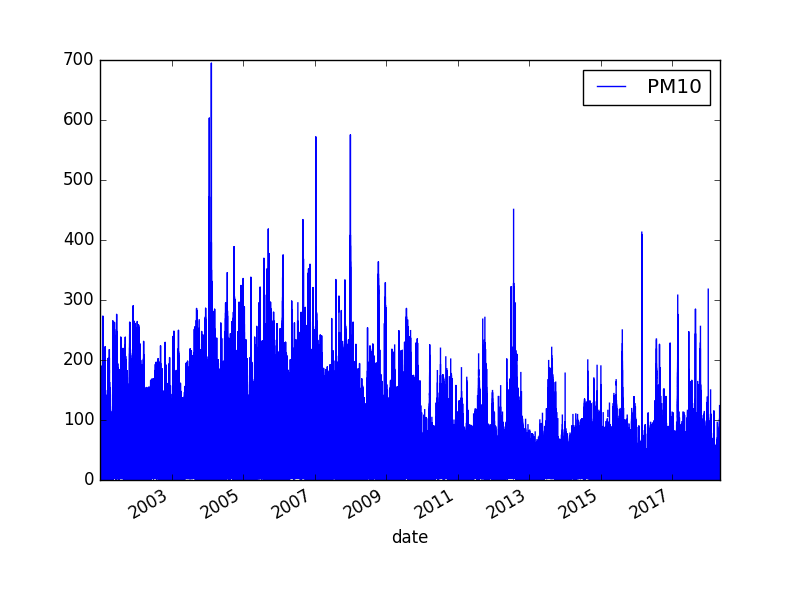

In [47]:
fullDF2.plot(x='date', y='PM10')
display()

Anpassen des Zeitstempel-Formats:

In [49]:
air_df_pd = air_df.toPandas()
air_df_pd["red_datetime"] = [air_df_pd["date"][i].replace(hour = 0, minute = 0) for i in range(len(air_df_pd))]
air_df_pd.head(2)

Out[ 23 ]: 
 date BEN CO EBE NMHC NO_2 O_3 \
0 2001-08-01 01:00:00 NaN 0.37 NaN NaN 58.400002 34.529999 
1 2001-08-01 01:00:00 1.5 0.34 1.49 0.07 56.250000 42.160000 

 PM10 SO_2 TCH TOL station red_datetime 
0 105.000000 6.34 NaN NaN 28079001 2001-08-01 
1 100.599998 8.11 1.24 10.82 28079035 2001-08-01

In [50]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
air_df_enhanced = sqlCtx.createDataFrame(air_df_pd)

Anpassen der Werte durch Berechnung des Durchschnitts:

In [52]:
air_df_enhanced.registerTempTable("airT_enh")
time_gas_con = sqlContext.sql("SELECT red_datetime, station, AVG(BEN) AS BEN, AVG(CO) AS CO, AVG(EBE) AS EBE, AVG(NMHC) AS NMHC, AVG(NO_2) AS NO_2, AVG(O_3) AS O_3, AVG(PM10) AS PM10, AVG(SO_2) AS SO_2, AVG(TCH) AS TCH, AVG(TOL) AS TOL FROM airT_enh GROUP BY red_datetime, station")

In [53]:
time_gas_con.take(10)

Out[ 26 ]: 
[Row(red_datetime=datetime.datetime(2001, 8, 12, 0, 0), station=28079038, BEN=nan, CO=0.6012500071277221, EBE=nan, NMHC=nan, NO_2=37.887916604677834, O_3=71.20666694641113, PM10=30.61624999841054, SO_2=12.047083338101706, TCH=nan, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 8, 21, 0, 0), station=28079012, BEN=nan, CO=1.3437500248352687, EBE=nan, NMHC=0.3058333294466138, NO_2=77.3395832379659, O_3=24.69125012556712, PM10=55.37624986966451, SO_2=25.885833501815796, TCH=1.6262499888737996, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 8, 22, 0, 0), station=28079004, BEN=nan, CO=0.8624999908109506, EBE=nan, NMHC=nan, NO_2=81.0654164950053, O_3=31.65166664123535, PM10=53.323749939600624, SO_2=9.901666661103567, TCH=nan, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 8, 24, 0, 0), station=28079011, BEN=nan, CO=1.0495833419263363, EBE=nan, NMHC=0.5358333326876163, NO_2=47.977916280428566, O_3=35.39416639010111, PM10=63.33041703701019, SO_2=13.45833327372869, TCH=1.8883333504199982, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 10, 4, 0, 0), station=28079019, BEN=nan, CO=0.6949999971936146, EBE=nan, NMHC=nan, NO_2=70.3975001970927, O_3=22.974166711171467, PM10=29.882499833901722, SO_2=7.542083352804184, TCH=nan, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 9, 5, 0, 0), station=28079011, BEN=nan, CO=0.39833333684752387, EBE=nan, NMHC=0.29541666743656, NO_2=31.720416843891144, O_3=63.1258331934611, PM10=34.566666881243385, SO_2=6.516666740179062, TCH=1.6083333293596904, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 9, 9, 0, 0), station=28079025, BEN=1.674583340684573, CO=0.4454166665673256, EBE=1.5170833294590313, NMHC=nan, NO_2=58.21250025431315, O_3=44.35999981562296, PM10=nan, SO_2=32.267499923706055, TCH=nan, TOL=10.057500084241232),
 Row(red_datetime=datetime.datetime(2001, 7, 4, 0, 0), station=28079040, BEN=nan, CO=0.361666664481163, EBE=nan, NMHC=0.15166666638106108, NO_2=46.230833212534584, O_3=41.05041662851969, PM10=34.61708333094915, SO_2=5.242083330949147, TCH=1.2108333359162013, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 7, 7, 0, 0), station=28079009, BEN=nan, CO=0.583749994635582, EBE=nan, NMHC=nan, NO_2=73.40625007947285, O_3=44.96125015616417, PM10=15.141666650772095, SO_2=20.539166529973347, TCH=nan, TOL=nan),
 Row(red_datetime=datetime.datetime(2001, 7, 9, 0, 0), station=28079009, BEN=nan, CO=0.738749993344148, EBE=nan, NMHC=nan, NO_2=86.46583278973897, O_3=34.62791655460993, PM10=22.337916771570843, SO_2=16.252499878406525, TCH=nan, TOL=nan)]

Darstellung der Anzahl Messreihen:

In [55]:
print(time_gas_con.count())

158827

Ausgabe der neuen Tabelle in Parquet-File:

In [57]:
time_gas_con.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018_time_gas_concentration.parquet")